In [3]:
#import seaborn as sns
import matplotlib.pyplot as pl
import glob
import pandas as pd
from datetime import datetime
path = "/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/*FIFO.csv"
all_file = glob.glob(path)

In [2]:
### file baseline simulation
all_file.sort(reverse = False)
all_file

['/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/simulated_log_LSTM_BPI_Challenge_2012_W_Two_TS_0_FIFO.csv',
 '/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/simulated_log_LSTM_BPI_Challenge_2012_W_Two_TS_1_FIFO.csv']

In [88]:
import pm4py
import warnings
import glob
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


def cycle_wait_SIM(path):
    df = pd.read_csv(path)
    resources = set(df['resource'])
    simulated_log = pm4py.format_dataframe(df, case_id='id_case', activity_key='activity',
                                                   timestamp_key='end_time', start_timestamp_key='start_time')
    simulated_log = pm4py.convert_to_event_log(simulated_log)
    CYCLE_TIME = []
    for trace in simulated_log:
        CYCLE_TIME.append((trace[-1]['end_time'] - trace[0]['start_time']).total_seconds())
    WAIT_TIME = []
    for trace in simulated_log:
        for i, event in enumerate(trace):
            if i > 0:
                WAIT_TIME.append((event['start_time']- trace[i-1]['end_time']).total_seconds())
    PROCESSING_TIME = []
    for trace in simulated_log:
        for event in trace:
            if event['concept:name']!= 'start':
                PROCESSING_TIME.append((event['end_time']- event['start_time']).total_seconds())
            
    return CYCLE_TIME, WAIT_TIME, PROCESSING_TIME

POLICY = ['RANDOM', 'FIFO_activity', 'FIFO_case', 'SPT']
CYCLE_TIME_tot = {'RANDOM': [], 'FIFO_activity': [], 'FIFO_case': [], 'SPT': []}
WAIT_TIME_tot = {'RANDOM': [], 'FIFO_activity': [], 'FIFO_case': [], 'SPT': []}
PROCESSING_TIME_tot = {'RANDOM': [], 'FIFO_activity': [], 'FIFO_case': [], 'SPT': []}
for p in POLICY:
    path = '/Users/francescameneghello/Documents/GitHub/RL_integration/output/output_BPI_Challenge_2012_W_Two_TS/ENTIRE_LOG_CALENDAR/'+ p +'/sim*.csv'
    all_file = glob.glob(path)
    for file in all_file:
        CYCLE_TIME, WAIT_TIME, PROCESSING_TIME = cycle_wait_SIM(file)
        CYCLE_TIME_tot[p] = CYCLE_TIME
        WAIT_TIME_tot[p] = WAIT_TIME
        PROCESSING_TIME_tot[p] = PROCESSING_TIME

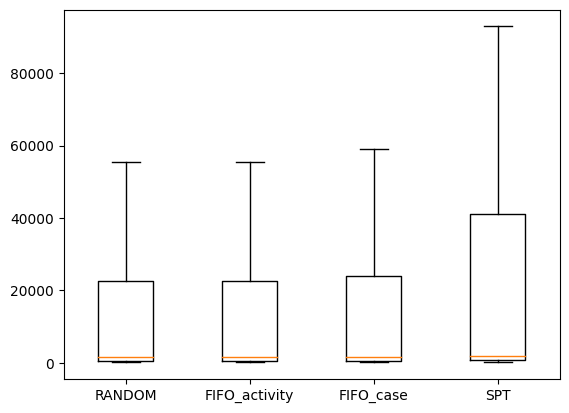

In [81]:
############ CYCLE TIME #################
bp = plt.boxplot([CYCLE_TIME_tot['RANDOM'], CYCLE_TIME_tot['FIFO_activity'],
                  CYCLE_TIME_tot['FIFO_case'], CYCLE_TIME_tot['SPT']], labels=POLICY, showfliers = False)

In [89]:
len(CYCLE_TIME_tot['SPT'])

8616

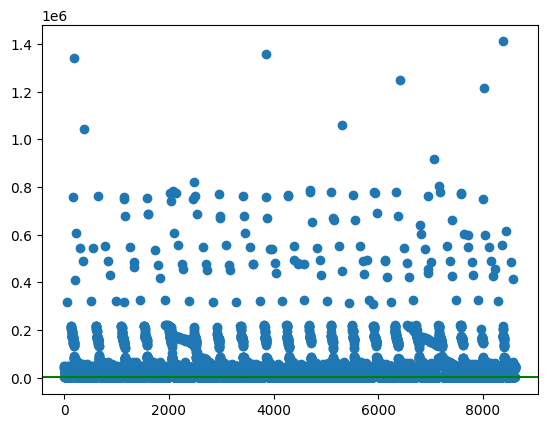

In [93]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data   
df=pd.DataFrame({'x_pos': range(0,8616), 'y_pos': CYCLE_TIME_tot['SPT'] })
    
# Plot
plt.plot( 'x_pos', 'y_pos', data=df, linestyle='none', marker='o')
 
# Annotation
#plt.axvline(40, color='r')
plt.axhline(4159.875, color='green')

# Show the graph
plt.show()

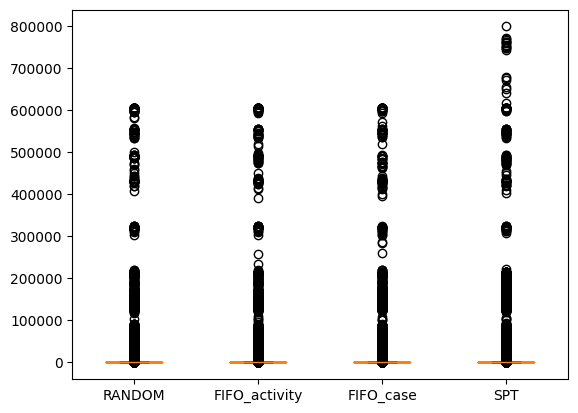

In [83]:
############ WAITING TIME #################
bp = plt.boxplot([WAIT_TIME_tot['RANDOM'], WAIT_TIME_tot['FIFO_activity'],
                  WAIT_TIME_tot['FIFO_case'], WAIT_TIME_tot['SPT']], labels=POLICY)

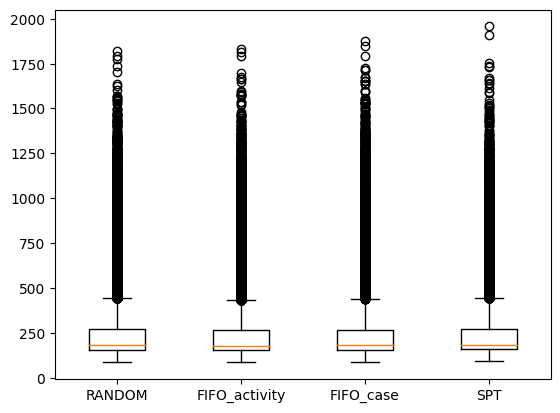

In [85]:
############ PROCESSING TIME #################
bp = plt.boxplot([PROCESSING_TIME_tot['RANDOM'], PROCESSING_TIME_tot['FIFO_activity'],
                  PROCESSING_TIME_tot['FIFO_case'], PROCESSING_TIME_tot['SPT']], labels=POLICY)

<AxesSubplot:xlabel='policy', ylabel='values'>

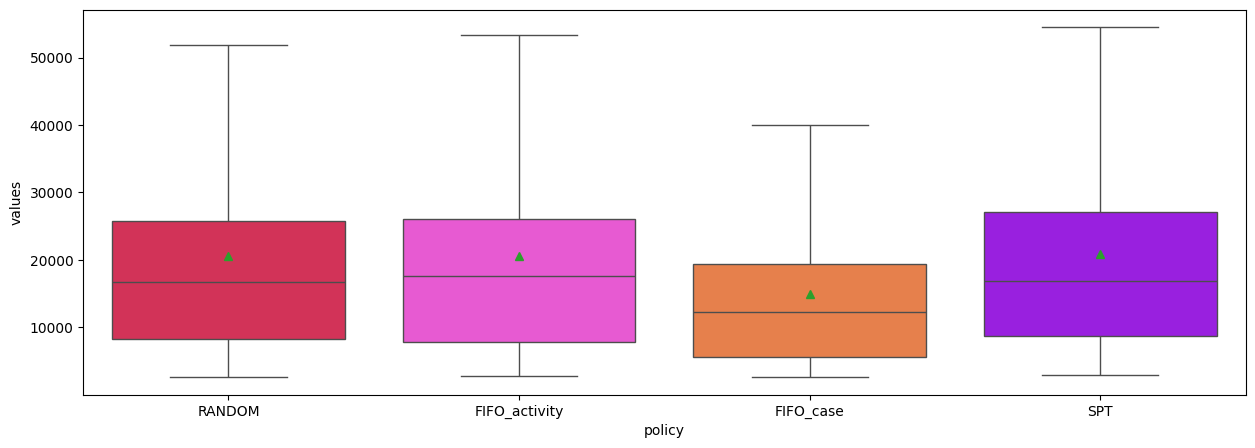

In [63]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
with open('/Users/francescameneghello/Documents/GitHub/RL_integration/output/output_confidential_1000/CALENDAR/results.json') as file:
    results = json.load(file)
    
   
    
results_values = {'policy': [], 'values': []}
for key in results:
    results_values['policy'] += [key] * len(results[key]['values'])
    results_values['values'] += results[key]['values']


#data = pd.DataFrame(results_values)
#data = np.array(data)
#plt.boxplot(data, labels=results_values.keys())
#plt.ylabel('Cycle time')
#plt.xlabel('Policies')

palette = {
    'RANDOM': "#ed184a",
    'FIFO_activity': "#ff42e2",
    'FIFO_case': "#ff7833",
    'SPT':"#a200ff"
}


df = pd.DataFrame(results_values)

# Figure Size
fig = plt.figure(figsize =(15, 5))
    
sns.boxplot(x='policy', y='values', data=df, order=['RANDOM', 'FIFO_activity', 'FIFO_case', 'SPT'], showmeans=True, palette = palette, showfliers = False)

In [25]:
with open('/Users/francescameneghello/Documents/GitHub/RL_integration/output/output_confidential_1000/NOT_CALENDAR/results.json') as file:
    results = json.load(file)
len(results['FIFO_activity']['values'])

1590

In [29]:
for key in results:
    print(key, len(results[key]['values']))

FIFO_activity 1590
FIFO_case 1590
RANDOM 1590
SPT 1590


In [36]:
sorted([5,2,3,4])

[2, 3, 4, 5]

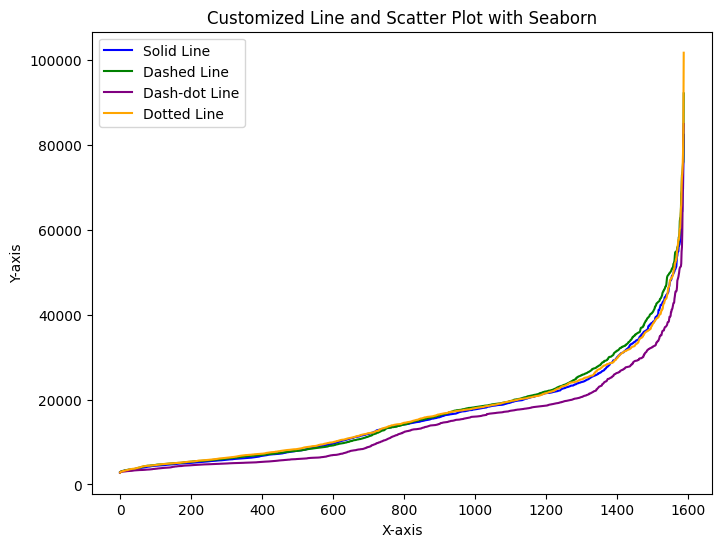

In [39]:
plt.figure(figsize=(8, 6))

x = [*range(0, len(results['FIFO_activity']['values']), 1)] 


# Solid line with circle markers
sns.lineplot(x=x, y=sorted(results['RANDOM']['values']), linestyle='-', markersize=8, label='Solid Line', color='blue') 

# Dashed line with square markers
sns.lineplot(x=x, y=sorted(results['FIFO_activity']['values']), linestyle='-', markersize=8, label='Dashed Line', color='green') 

# Dash-dot line with triangle up markers
sns.lineplot(x=x, y=sorted(results['FIFO_case']['values']), linestyle='-',  markersize=8, label='Dash-dot Line', color='purple') 

# Dotted line with asterisk markers
sns.lineplot(x=x, y=sorted(results['SPT']['values']), linestyle='-', markersize=8, label='Dotted Line', color='orange') 

plt.title('Customized Line and Scatter Plot with Seaborn') # Add a title
plt.xlabel('X-axis') # x-axis name
plt.ylabel('Y-axis') # x-axis name
plt.legend(loc='upper left') # Add a legend
plt.show() # Display the graph

In [5]:
LOG = ['L2_syn', 'L4_syn', 'L6_syn', 'L3_syn', 'L1_syn', 'L5_syn']

palette = {
    'RIMS': "#ed184a",
    'RIMS_PLUS': "#ff42e2"
}
    
f, axes = plt.subplots(6, 5, figsize = (20,40))
#results = {}
for i, name in enumerate(LOG):
    NAME = name
    for j, m in enumerate(metrics):
        #sns.set(rc={'figure.figsize':(8,6)})
        #sns.set_style(style='white')
        sns.boxplot(data = define_data(m, method, results_queue[NAME]),
                        hue = 'method',
                        x = 'columns',
                        y = 'value', ax=axes[i][j], palette = palette)
        axes[i][j].set(xticklabels=[])
        axes[i][j].legend([],[], frameon=False)
        axes[i][j].set(xlabel=None)
        if j == 0:
            axes[i][j].set(ylabel=None)
        else:
            axes[i][j].set(ylabel=None)
        if j == 2:
            axes[i][j].set_title(m + '\n' + NAME, fontsize=18, fontweight="bold") 
        else:
            axes[i][j].set_title(m, fontsize=18, fontweight="bold") 

,FIFO_activity,FIFO_case,RANDOM,SPT
0,17737.0,13426.0,25837.0,4423.0
1,6586.0,18325.0,15832.0,15535.0
2,6359.0,45512.0,5459.0,4379.0
3,4858.0,17487.0,4194.0,4379.0
4,5945.0,18009.0,17985.0,16807.0
...,...,...,...,...
1585,7597.0,11296.0,5010.0,5834.0
1586,9120.0,10121.0,4744.0,8490.0
1587,18155.0,14666.0,4660.0,5645.0
1588,15123.0,24867.0,22678.0,7639.0
